In [ ]:
#importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
print(f"Version : {tf.__version__}")

Version : 2.12.0


### 2.1 Loading the FashionMNIST dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
print("Shapes : ")
print(f"Train\nFeatures : {train_images.shape}, Labels : {train_labels.shape}")
print(f"Test\nFeatures : {test_images.shape}, Labels : {test_labels.shape}")

Shapes : 
Train
Features : (60000, 28, 28), Labels : (60000,)
Test
Features : (10000, 28, 28), Labels : (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 2.2 Plot the images and scale them


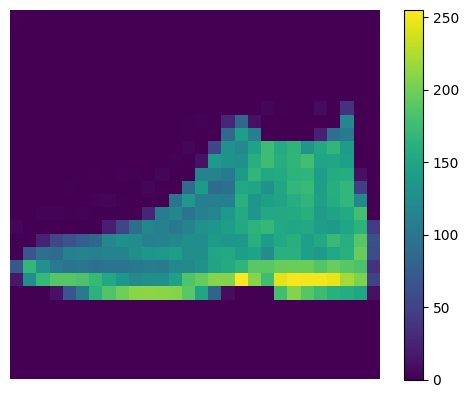

In [ ]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.axis(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

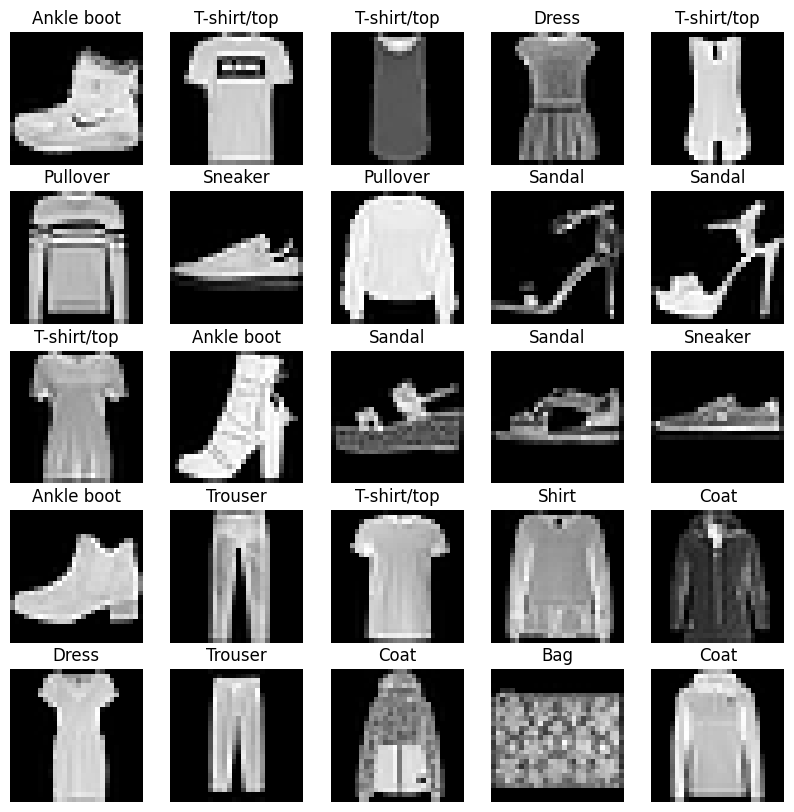

In [ ]:
fig = plt.figure(figsize = (10, 10))
rows, cols = 5, 5

for i in range(1, rows * cols + 1) :
  fig.add_subplot(rows, cols, i)
  plt.imshow(train_images[i-1], cmap='gray')
  plt.axis(False)
  plt.title(class_names[train_labels[i-1]])

### 2.3 Creating the Model

In [ ]:
FashionMNIST_model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### 2.4 Compiling the Model

In [ ]:
FashionMNIST_model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### 2.5 Training and Evaluating the model

In [ ]:
FashionMNIST_model1.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.5005 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3778 - accuracy: 0.8628
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3401 - accuracy: 0.8746
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3135 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2975 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2816 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2691 - accuracy: 0.8997
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2602 - accuracy: 0.9027
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2490 - accuracy: 0.9069
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0

In [ ]:
test_loss, test_acc = FashionMNIST_model1.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy : {test_acc:.3f}")

313/313 - 1s - loss: 0.3361 - accuracy: 0.8831 - 895ms/epoch - 3ms/step
Test Accuracy : 0.883


### 2.6 Logits to Pred_probs models

In [ ]:
FashionMNIST_model2 = tf.keras.Sequential([
    FashionMNIST_model1,
    tf.keras.layers.Softmax()
])

### 2.7 Testing the model

In [ ]:
predictions = FashionMNIST_model2(test_images)

In [ ]:
print(f"Actual : {test_labels[0]} | Pred : {np.argmax(predictions[0])}")

Actual : 9 | Pred : 9


In [ ]:
def plot_image(img, prediction, true_label) :
  plt.imshow(img, cmap=plt.cm.binary)
  pred_label = np.argmax(prediction)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  color = 'green' if pred_label == true_label else 'red'
  title = f"{class_names[pred_label]} {100*np.max(prediction):2.0f}% ({class_names[true_label]})"
  plt.xlabel(title, color=color)

def plot_value_array(prediction, true_label) :
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  barPlot = plt.bar(range(10), prediction, color='gray')
  pred_label = np.argmax(prediction)
  plt.ylim([0, 1])
  barPlot[pred_label].set_color('red')
  barPlot[true_label].set_color('green')

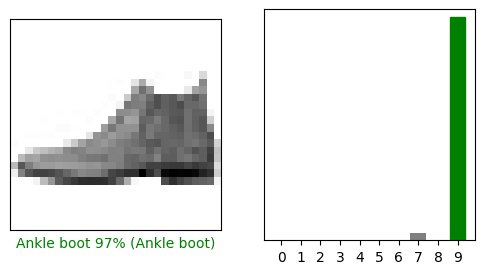

In [ ]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(test_images[i], predictions[i], test_labels[i])
plt.subplot(1, 2, 2)
plot_value_array(predictions[i], test_labels[i])
plt.show()

### 2.8 Evaluating the model for random samples

In [ ]:
def random_samples(input, predictions, output, n_samples) :
  samples = list()
  for i in range(n_samples) :
    random_idx = random.randint(0, len(input))
    samples.append([input[random_idx], predictions[random_idx], output[random_idx]])
  return samples


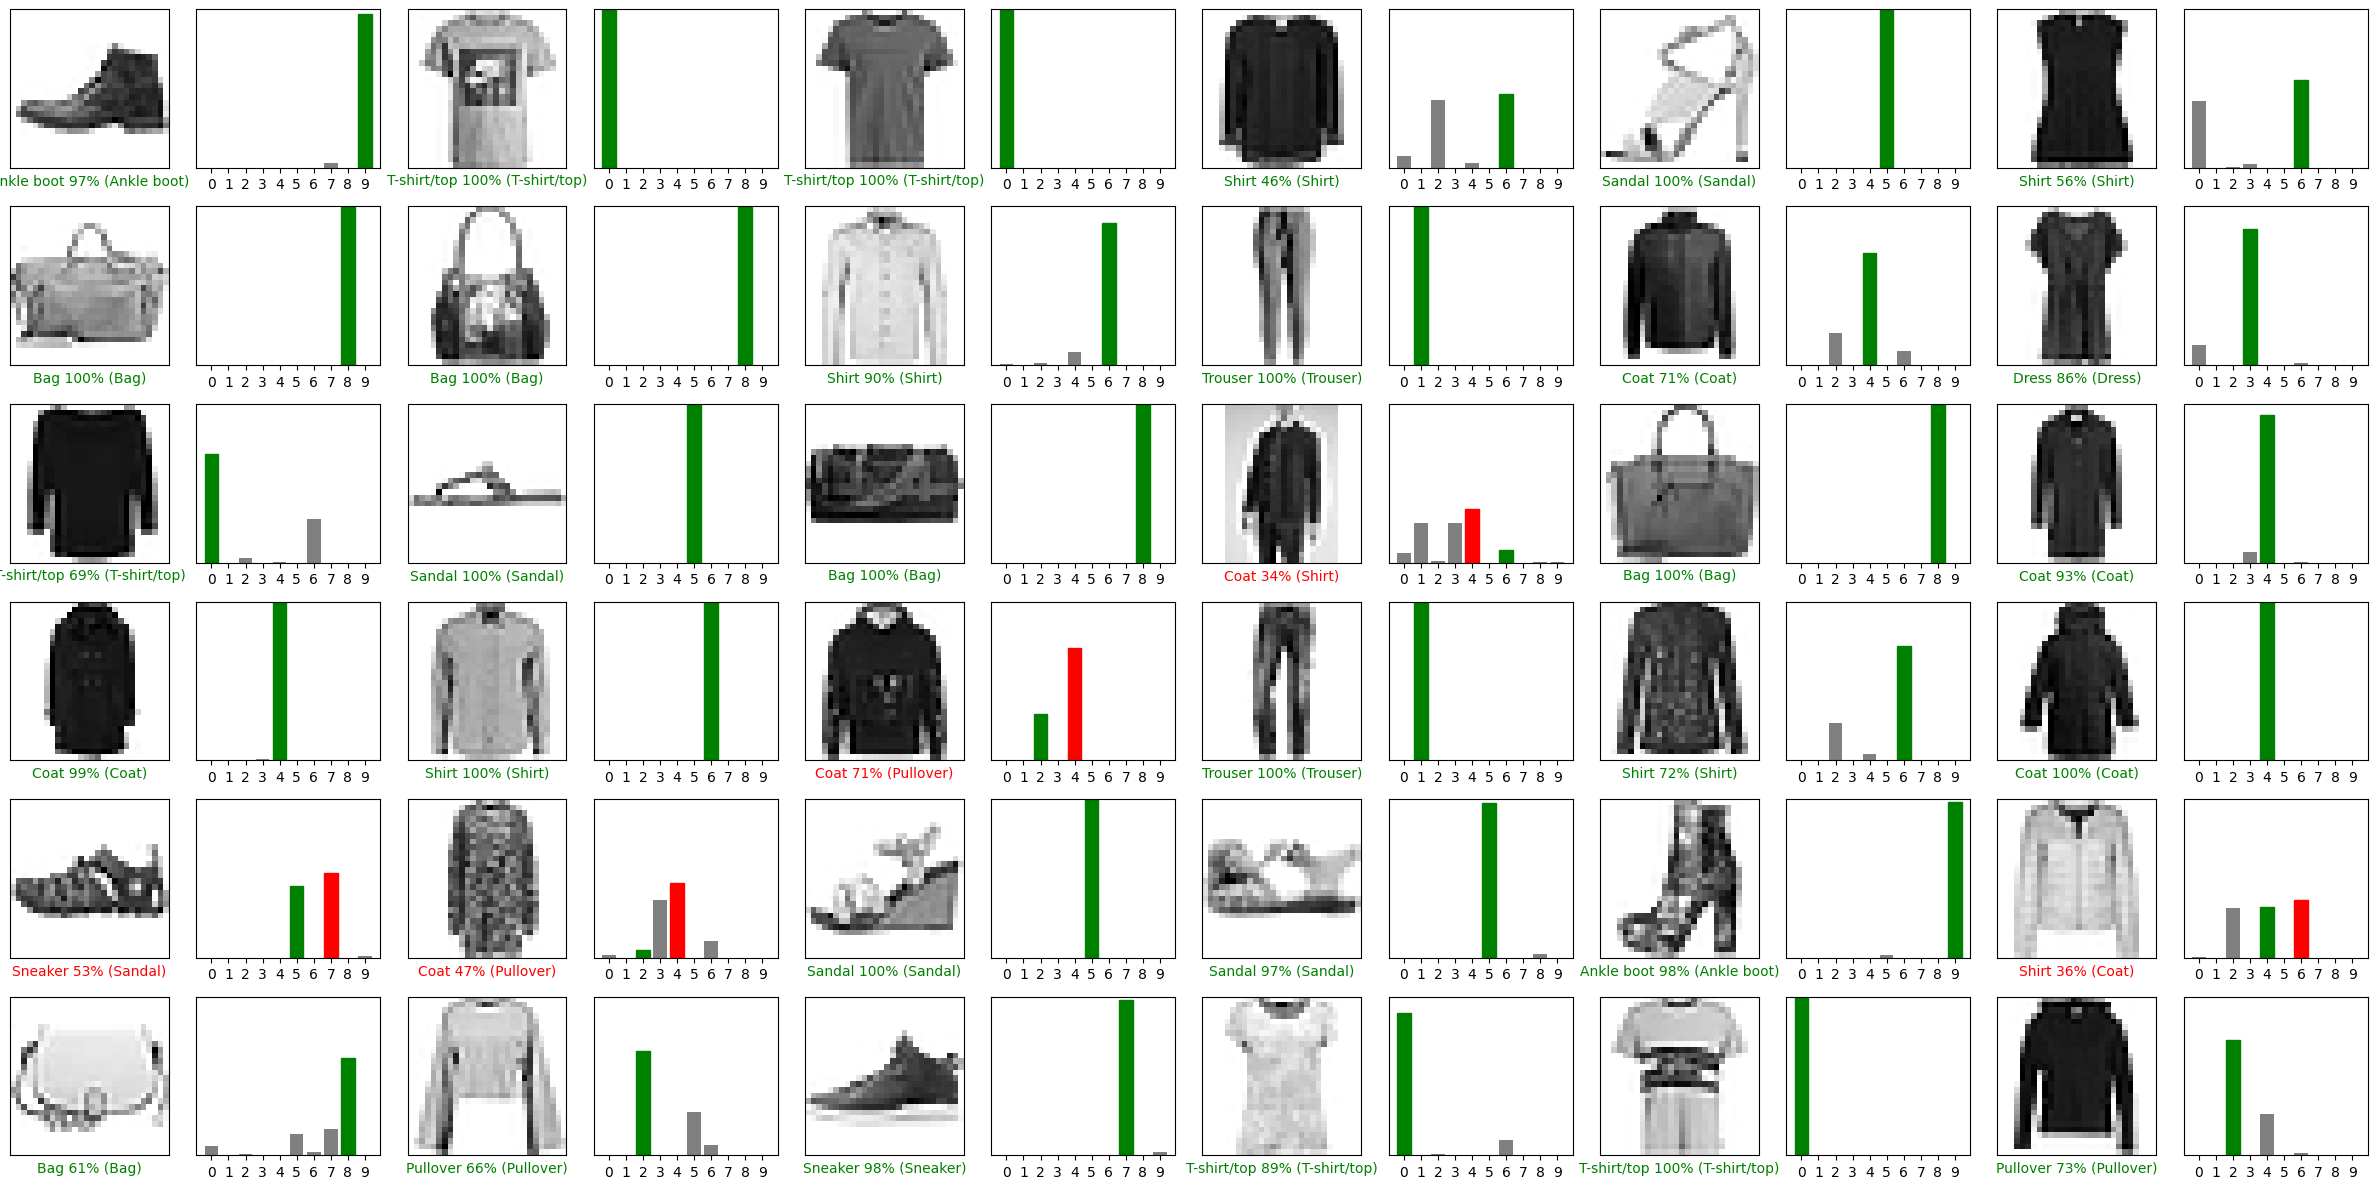

In [ ]:
rows, cols = 6, 6
n_samples = rows * cols
samples = random_samples(test_images, predictions, test_labels, n_samples)
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(rows * cols) :
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_image(samples[i][0], samples[i][1], samples[i][2])
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_value_array(samples[i][1], samples[i][2])
plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 21ms/step


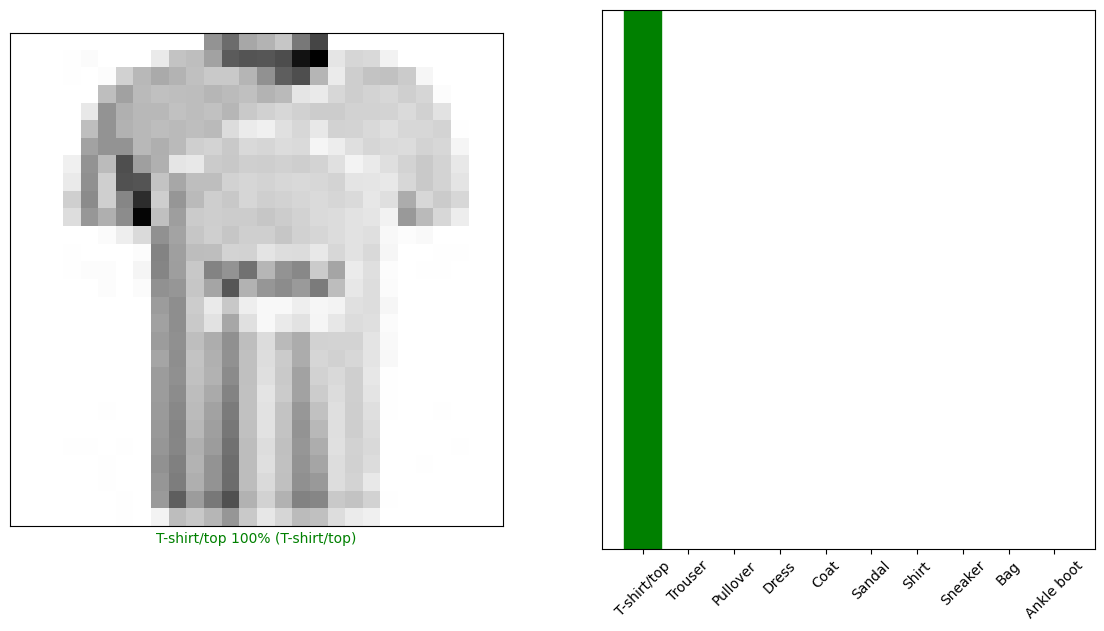

In [ ]:
i = random.randint(0, len(test_images))
plt.figure(figsize=(14, 7))
prediction = FashionMNIST_model2.predict(np.expand_dims(test_images[i], 0))
plt.subplot(1, 2, 1)
plot_image(test_images[i], prediction[0], test_labels[i])
plt.subplot(1, 2, 2)
plot_value_array(prediction[0], test_labels[i])
plt.xticks(range(10), class_names, rotation=45)
plt.show()